Import Libaries

In [287]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import eig  

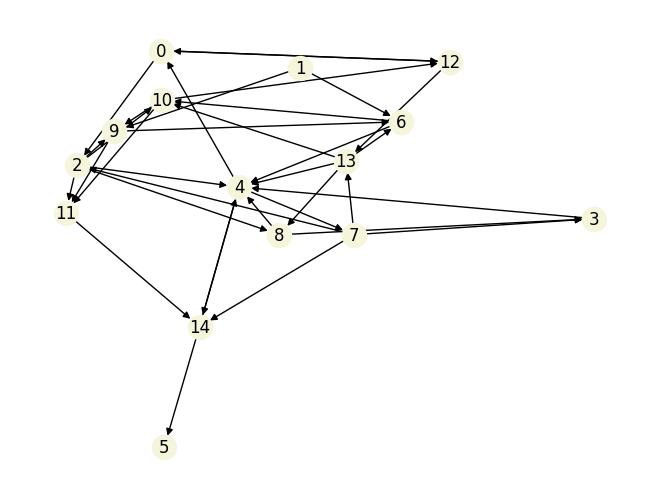

In [288]:
G = nx.gnm_random_graph(15,35,directed=True)

nx.draw(G, with_labels='True', node_color='Beige')
plt.show()

In [289]:
n = int(G.number_of_nodes()) # Get the total number of nodes in the graph

A = nx.to_numpy_array(G) # Get the adjacency matrix of graph G
M = np.zeros((n, n))

for i in range(n):
    out_deg = G.out_degree(i)      
    for j in range(n):
        if A[i,j] == 1:
            M[i,j] = A[i,j] / out_deg
print(M)

'''            
A /= A.sum(axis=1)
A
'''


[[0.         0.         0.5        0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.5        0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.5        0.         0.         0.5        0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.2        0.
  0.         0.         0.2        0.2        0.2        0.2
  0.         0.         0.        ]
 [0.         0.         0.         0.         1.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.33333333 0.         0.         0.         0.         0.
  0.         0.33333333 0.         0.         0.         0.
  0.         0.         0.33333333]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.5        0.
  0

'            \nA /= A.sum(axis=1)\nA\n'

In [290]:
eigenvalues, eigenvectors = np.linalg.eig(M.T)
max_eigenvalue = np.argmax(eigenvalues)
largest_eigenvector = eigenvectors[:, max_eigenvalue]
print(max_eigenvalue)
print(np.round(largest_eigenvector,3))
largest = largest_eigenvector.real
largest


1
[-0.338+0.j  0.   +0.j -0.239+0.j -0.111+0.j -0.578+0.j -0.241+0.j
 -0.11 +0.j -0.208+0.j -0.102+0.j -0.11 +0.j -0.161+0.j -0.169+0.j
 -0.241+0.j -0.186+0.j -0.447+0.j]


array([-0.3380785 ,  0.        , -0.23884629, -0.11126099, -0.57769495,
       -0.24133358, -0.10952852, -0.20806324, -0.1019151 , -0.10963114,
       -0.16108696, -0.16885844, -0.24066133, -0.18621748, -0.44671416])

In [291]:
def markov_chain(G,d=1):

    L = np.asmatrix(nx.to_numpy_array(G))
    n = len(L)
    p = np.repeat(1.0 / n, n) # Personalization vector

    # In case the graph has websites that do not link to any website 
    # even though there are links to other websites pointing to it.
    dangling_weight = p
    dangling_node = np.where(L.sum(axis=1)==0)[0]

    for node in dangling_node:
        L[node] = dangling_weight


    L /= L.sum(axis=1)
    L = d * L + (1 - d) * p

    return L
L = markov_chain(G)


In [292]:
def pagerank(G,d=1):
    if len(G) == 0: return {}
    L = markov_chain(G,d=1)

    eigvls, eigvcs = np.linalg.eig(L.T)
    max_eigvls = np.argmax(eigvls)
    print(max_eigenvalue)

    largest_eigvcs = np.array(eigvcs[:,max_eigvls]).flatten().real
    print(largest_eigvcs)
    norm = float(largest_eigvcs.sum())
    return dict(zip(G, largest_eigvcs / norm))
pagerank(G)




1
[0.32539963 0.01582711 0.23024407 0.12174163 0.57312431 0.23740672
 0.13442186 0.20686855 0.10839476 0.12832472 0.17560569 0.18457352
 0.23706216 0.18607533 0.4431592 ]


{0: 0.09836066501703916,
 1: 0.0047841649348219824,
 2: 0.06959737335080886,
 3: 0.036799635923463574,
 4: 0.1732420160851413,
 5: 0.07176247402232978,
 6: 0.04063257166129448,
 7: 0.06253150362986903,
 8: 0.032765190162348565,
 9: 0.03878954740339336,
 10: 0.05308147599299586,
 11: 0.05579223863767908,
 12: 0.07165832277434,
 13: 0.05624620222945957,
 14: 0.13395661817501525}

1
[0.32539963 0.01582711 0.23024407 0.12174163 0.57312431 0.23740672
 0.13442186 0.20686855 0.10839476 0.12832472 0.17560569 0.18457352
 0.23706216 0.18607533 0.4431592 ]


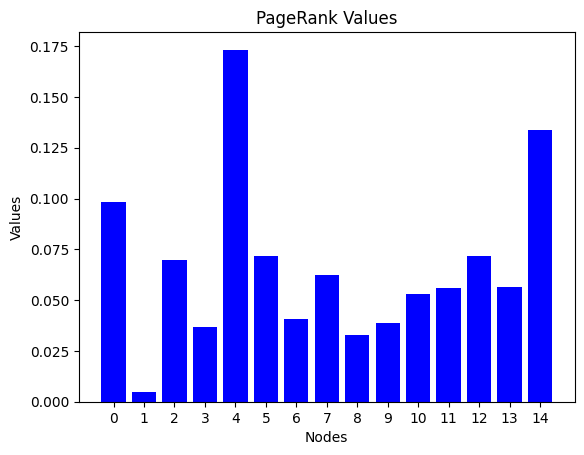

In [293]:
value = pagerank(G)
categories = list(value.keys())
values = list(value.values())

plt.bar(categories, values, color='blue')
plt.xticks(range(15))
plt.title('PageRank Values')
plt.xlabel('Nodes')
plt.ylabel('Values')
plt.show()


### Explain Pagerank and Markov chain: https://www.youtube.com/watch?v=JGQe4kiPnrU